In [1]:
%matplotlib inline
import random
from d2l import torch as d2l
import torch

In [31]:
def synthetic_data(w, b, num_examples): #@save
    X = torch.normal(0, 1, (num_examples, len(w)))
    y1 = torch.mv(X, w) + b + torch.normal(0, 0.01, (num_examples,))
    return X, y1.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels1 = synthetic_data(true_w, true_b, 1000)
labels1.shape

torch.Size([1000, 1])

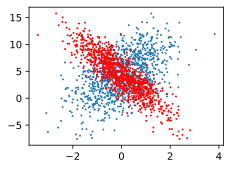

In [38]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 0].detach().numpy(), labels1.detach().numpy(), 1)
d2l.plt.scatter(features[:, 1].detach().numpy(), labels1.detach().numpy(), s=1, c='red') # s=1

In [42]:
def data_iter(batch_size, features, labels): 
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # random.shuffle()函数将序列的所有元素随机排序
    for i in range(0, num_examples, batch_size):
        batch_indices = indices[i: min(i + batch_size, num_examples)]
        yield features[batch_indices], labels[batch_indices] # yield关键字将函数变成生成器

batch_size = 10
for X, y in data_iter(batch_size, features, labels1):
    print(X, '\n', y)
    break

tensor([[ 0.5082, -0.6597],
        [-0.3914,  1.2466],
        [ 0.0339, -0.9059],
        [-0.0504, -0.6367],
        [-2.2721,  0.0506],
        [-0.8309,  1.9720],
        [ 0.5495, -0.3520],
        [-0.8985,  0.4355],
        [-1.6053,  1.9754],
        [-2.1410, -0.1238]]) 
 tensor([[ 7.4622],
        [-0.8298],
        [ 7.3366],
        [ 6.2656],
        [-0.5144],
        [-4.1654],
        [ 6.4820],
        [ 0.9189],
        [-5.7368],
        [ 0.3382]])


In [44]:
# 初始化模型参数
w = torch.normal(0, 0.01, size=(2, ), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w.shape

torch.Size([2])

In [45]:
def linreg(X, w, b): #@save
    return torch.mv(X, w) + b

def squared_loss(y_hat, y): #@save
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [65]:
def sgd(params, learning_rate, batch_size): #@save
    with torch.no_grad(): # 禁用梯度计算
        for param in params:
            param -= learning_rate * param.grad / batch_size
            param.grad.zero_() # 梯度清零

In [80]:
learning_rate = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels1):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], learning_rate, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels1)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000055
epoch 2, loss 0.000055
epoch 3, loss 0.000055


In [82]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')


w的估计误差: tensor([ 2.8849e-05, -4.6730e-05], grad_fn=<SubBackward0>)
b的估计误差: tensor([-6.6280e-05], grad_fn=<RsubBackward1>)
